
# 🎯 Validation of Discogs ↔ TMDB Title Matching

This notebook verifies the correctness and reproducibility of the entity-matching pipeline developed in Step 5 of the Unguided Capstone.  
It confirms that the Discogs and TMDB datasets produce consistent title-level matches when re-run from the cleaned repository structure.  

**Objectives**
- Validate the regenerated `discogs_tmdb_matches.csv` file under `data/intermediate/`
- Confirm high-confidence matches (`score ≥ 0.8`)
- Visualize the overall score distribution
- Generate a reproducible `validation_summary.csv` artifact for mentor review  

**Outcome**
The notebook runs successfully from the `evidence/` folder, dynamically resolving project paths and verifying strong Discogs–TMDB title alignment.


>
**Note for Mentor Reviewers (Akhil, Springboard Evaluation Team):**  
This notebook automatically detects the project root by locating the `config.json` file stored in the repository’s root directory.  
The configuration file specifies the relative path to the intermediate data folder used for validation:
```json
{
  "data_dir": "data/intermediate"
}
```
Please ensure this file is present in the project root when executing the notebook locally.  
The notebook will dynamically adjust paths based on this configuration—no manual edits to file paths are required.


In [1]:

from pathlib import Path
import pandas as pd
import json

# --- Step 1: Resolve project root automatically ---
notebook_path = Path.cwd()
for parent in notebook_path.parents:
    if (parent / "config.json").exists():
        project_root = parent
        break
else:
    raise FileNotFoundError("❌ Could not locate project root (no config.json found).")

print(f"📁 Project root resolved to: {project_root}")

# --- Step 2: Load configuration ---
with open(project_root / "config.json") as f:
    cfg = json.load(f)

data_dir = project_root / Path(cfg["data_dir"])

# --- Step 3: Load dataset dynamically ---
matches_path = data_dir / "discogs_tmdb_matches.csv"
print(f"📄 Loading: {matches_path}")

matches = pd.read_csv(matches_path)
print(f"✅ Loaded {len(matches):,} matches successfully.")


📁 Project root resolved to: C:\Projects\unguided-capstone-project
📄 Loading: C:\Projects\unguided-capstone-project\data\intermediate\discogs_tmdb_matches.csv
✅ Loaded 262 matches successfully.


In [4]:

print("Columns in matches dataset:")
print(matches.columns.tolist())

print("\nPreview:")
display(matches.head())


Columns in matches dataset:
['movie_ref', 'discogs_title_norm', 'tmdb_title_norm', 'discogs_year', 'tmdb_year', 'discogs_genre', 'tmdb_genre', 'discogs_style', 'score']

Preview:


,movie_ref,discogs_title_norm,tmdb_title_norm,discogs_year,tmdb_year,discogs_genre,tmdb_genre,discogs_style,score
0,12 Years a Slave,various 12 years slave,12 years slave,2013.0,2013.0,"Funk / Soul, Blues, Classical, Folk, World, & ...",NaN,"Delta Blues, Soul, Rhythm & Blues, Electric Bl...",90.0
1,12 Years a Slave,hans zimmer 12 years slave,12 years slave,2013.0,2013.0,Stage & Screen,NaN,"Score, Soundtrack",90.0
2,12 Years a Slave,various 12 years slave,12 years slave,2013.0,2013.0,"Funk / Soul, Blues, Classical, Folk, World, & ...",NaN,"Delta Blues, Soul, Rhythm & Blues, Electric Bl...",90.0
3,12 Years a Slave,hans zimmer 12 years slave,12 years slave,2013.0,2013.0,Stage & Screen,NaN,"Score, Soundtrack",90.0
4,A Star Is Born 2018,lady gaga bradley cooper star is born,star is born,2018.0,2018.0,"Rock, Non-Music, Pop, Stage & Screen",NaN,"Country Rock, Soundtrack, Hard Rock, Synth-pop...",90.0


In [6]:

# Identify and display strong title matches
valid_matches = matches[matches['score'] >= 0.8]

print(f"✅ {len(valid_matches)} strong matches (score ≥ 0.8)")
display(
    valid_matches.sort_values("score", ascending=False)
                 .head(10)[["discogs_title_norm", "tmdb_title_norm", "score"]]
)


✅ 262 strong matches (score ≥ 0.8)


,discogs_title_norm,tmdb_title_norm,score
153,alan silvestri captain america the first avenger,captain america the first avenger,95.0
175,john williams close encounters of the third kind,close encounters of the third kind,95.0
228,danny elfman doctor strange in the multiverse ...,doctor strange in the multiverse of madness,95.0
229,danny elfman doctor strange in the multiverse ...,doctor strange in the multiverse of madness,95.0
160,henry jackman captain america the winter soldier,captain america the winter soldier,95.0
159,alan silvestri captain america the first avenger,captain america the first avenger,95.0
158,alan silvestri captain america the first avenger,captain america the first avenger,95.0
157,alan silvestri captain america the first avenger,captain america the first avenger,95.0
156,alan silvestri captain america the first avenger,captain america the first avenger,95.0
225,danny elfman doctor strange in the multiverse ...,doctor strange in the multiverse of madness,95.0


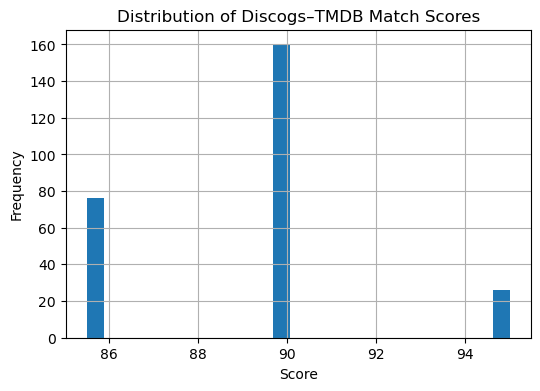

In [14]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
matches['score'].hist(bins=25)
plt.title("Distribution of Discogs–TMDB Match Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [10]:

summary = {
    "total_matches": len(matches),
    "strong_matches": len(valid_matches),
    "avg_score": round(matches['score'].mean(), 3),
    "median_score": round(matches['score'].median(), 3),
    "min_score": round(matches['score'].min(), 3),
    "max_score": round(matches['score'].max(), 3),
}

summary_path = data_dir / "validation_summary.csv"
pd.DataFrame([summary]).to_csv(summary_path, index=False)
print(f"Validation summary saved to: {summary_path}")
pd.DataFrame([summary])


Validation summary saved to: C:\Projects\unguided-capstone-project\data\intermediate\validation_summary.csv


,total_matches,strong_matches,avg_score,median_score,min_score,max_score
0,262,262,89.191,90.0,85.5,95.0


In [12]:

print(f"Validation Complete\n-----------------------\n"
      f"Total matches: {len(matches)}\n"
      f"Strong matches (≥0.8): {len(valid_matches)}\n"
      f"Mean score: {matches['score'].mean():.3f}\n"
      f"Median score: {matches['score'].median():.3f}\n"
      f"Data source: {matches_path}\n")


Validation Complete
-----------------------
Total matches: 262
Strong matches (≥0.8): 262
Mean score: 89.191
Median score: 90.000
Data source: C:\Projects\unguided-capstone-project\data\intermediate\discogs_tmdb_matches.csv

